In [1]:
import numpy as np
import keras
import utils

import matplotlib.pyplot as plt

print("Keras : {}".format(keras.__version__))
%matplotlib inline 

Using TensorFlow backend.


Keras : 2.0.6


## Caisse à outils 

```python 
#charger le dataset mnist
utils.load_mnist

# effectuer une opération de reshape (ajouter une dimension)
np.expand_dims

#one-hot encoding des labels
keras.utils.np_utils.to_categorical

#créer un modèle avec Keras
keras.models.Sequential

#ajouter des couches dedans 
keras.layers.InputLayer
keras.layers.Conv2D
keras.layers.MaxPooling2D
keras.layers.Flatten
keras.layers.Dense
keras.layers.Activation

#entrainer le modele par descente du gradient
keras.optimizers.SGD

```

## Importer et pré-traitement des données

In [6]:
(x_train, y_train), (x_test, y_test) = utils.load_mnist(path="mnist/")

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train = x_train/255.
x_test = x_test/255.

**Shape** 

Pour les réseaux convolutifs on tient compte de la structure des images :
- des pixels voisins sont corrélés et partagent de l'information en commun
- des pixels éloignés n'ont pas à intéragir ensemble

Du coup on garde la forme [28, 28] pixels des images. 

Mais on doit rajouter une dimension à la fin, pour avoir une shape = [28, 28, 1]. 

Cela ne change rien à nos images. 

(pour des images RGB : [28, 28, 3])

In [7]:
print("(avant)-->  x_train.shape : {}".format(x_train.shape))
x_train = np.expand_dims(x_train, axis=-1)
print("(après)-->  x_train.shape : {}".format(x_train.shape))

x_test = np.expand_dims(x_test, axis=-1)

(avant)-->  x_train.shape : (60000, 28, 28)
(après)-->  x_train.shape : (60000, 28, 28, 1)


In [8]:
from keras.utils.np_utils import to_categorical
y_train_enc = to_categorical(y_train, num_classes=10)
y_test_enc = to_categorical(y_test, num_classes=10)

## Construction du réseau de neurones

In [10]:
# Point de départ
from keras.models import Sequential
# Couches nécessaires
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, InputLayer

**Historique** 
- ce modèle correspond presque exactement au `LeNet5`
- l'un des premiers réseaux convolutifs crée par Yann Lecun (directeur de l'IA chez Facebook maintenant)
- application: détection des caractères sur les chèques de banque 

In [11]:
model = Sequential()
model.add(InputLayer(input_shape=(28, 28, 1)))
model.add(Conv2D(6, 5, activation='sigmoid', padding='valid'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(6, 5, activation='sigmoid', padding='valid'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(Flatten())
model.add(Dense(120, activation='sigmoid'))
model.add(Dense(84, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 6)         156       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 6)           906       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 6)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 96)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               11640     
__________

In [15]:
from keras.utils import plot_model
plot_model(model, to_file='models/model_CNN_LeNet5.png')

## Apprentissage du réseau de neurones

- même si le réseau a beaucoup changé 
- on garde les mêmes ligne de code pour lancer l'entraînement. 

In [17]:
from keras.optimizers import SGD
sgd = SGD(lr=0.01, momentum=0.9)

In [18]:
model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
history = model.fit(x_train, y_train_enc,
              batch_size=32, epochs=50,
              verbose=2,
              validation_split=0.2,
              shuffle=True)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50


KeyboardInterrupt: 

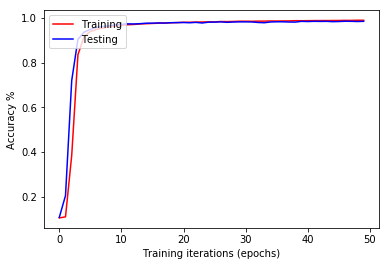

In [29]:
plt.plot(history.history['acc'],'r')
plt.plot(history.history['val_acc'],'b')
plt.ylabel('Accuracy %')
plt.xlabel('Training iterations (epochs)')
plt.legend(['Training','Testing'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'b')
plt.ylabel('Loss %')
plt.xlabel('Training iterations (epochs)')
plt.legend(['Training','Testing'], loc='upper left')
plt.show()

## Evaluer son modèle

In [ ]:
res = model.evaluate(x_test, y_test_enc)
print("\n[loss, accuracy] : {}".format(res))

In [ ]:
model.save("models/model_CNN_LeNet5.h5")